# サンプルコード

## 準備まとめ

ダウンロードとインストール

In [1]:
!git clone https://github.com/ghmagazine/python_stat_sample.git
!mv ./python_stat_sample/data ./data
!pip install japanize-matplotlib

Cloning into 'python_stat_sample'...
remote: Enumerating objects: 130, done.
remote: Total 130 (delta 0), reused 0 (delta 0), pack-reused 130
Receiving objects: 100% (130/130), 8.22 MiB | 38.99 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 32.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=311c2bb0b8abd913b37dd9c359cb58ad873bcd38652173fc9081e47a8865dcb6
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


インポートと設定

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

%precision 3
pd.set_option('precision', 3)

## おさらい

サイコロの確率関数と確率分布

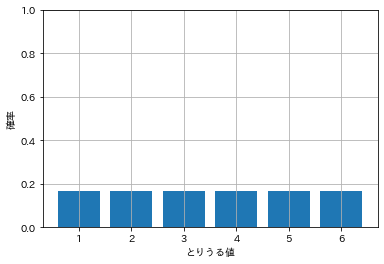

In [3]:
def dice_prob_func(x):
    return 1 / 6

dice_x_set = [1, 2, 3, 4, 5, 6]
dice_prob = np.array([dice_prob_func(x) for x in dice_x_set])

plt.bar(dice_x_set, dice_prob)
plt.ylim(0.0, 1.0)
plt.xlabel('とりうる値')
plt.ylabel('確率')
plt.grid(True)
plt.show()

度数分布による確率分布の推定

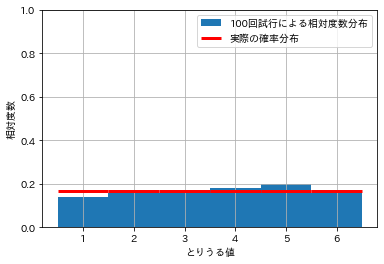

In [4]:
num_trial = 100
dice_sample = np.random.choice(dice_x_set, num_trial)

plt.hist(
    dice_sample, bins=len(dice_x_set), range=(1, 7), density=True,
    label=f'{num_trial}回試行による相対度数分布')
plt.hlines(
    dice_prob, np.arange(1, 7), np.arange(2, 8), color='red', lw=3, label='実際の確率分布')

plt.xticks(np.linspace(1.5, 6.5, 6), labels=np.arange(1, 7))
plt.ylim(0.0, 1.0)
plt.xlabel('とりうる値')
plt.ylabel('相対度数')
plt.legend()
plt.grid(True)
plt.show()

## 代表的な離散型確率分布

### 準備

期待値と分散の関数

In [5]:
def E(X, g=lambda x: x):
    x_set, f = X

    return np.sum([g(k) * f(k) for k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    
    mean = E(X, g)
    return np.sum([(g(k) - mean) ** 2 * f(k) for k in x_set])

確率変数の性質の確認・表示

In [6]:
def check_prob(X):
    x_set, f = X

    prob = np.array([f(k) for k in x_set])
    assert np.all(prob >= 0), '負の確率があります'

    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'確率の和が{prob_sum}になりました'

    print(f'期待値: {E(X):.4}, 分散: {V(X):.4}')

In [38]:
def plot_prob(X, size=(10, 6)):
    x_set, f = X

    prob = np.array([f(k) for k in x_set])
    e = E(X)

    plt.figure(figsize=size)
    plt.bar(x_set, prob, label='確率')
    plt.vlines(e, 0, 1, label='期待値', color='red')
    plt.xticks(np.append(x_set, e))
    plt.ylim(0, prob.max() * 1.2)
    plt.legend()
    plt.grid(True)
    plt.show()

### ベルヌーイ分布

ベルヌーイ分布の確率関数

In [8]:
def prob_bernoulli(x, p, x_set):
    if x in x_set:
        return p ** x * (1 - p) ** (1 - x)
    else:
        return 0

サイコロで6が出るか，の確率分布

In [19]:
bern_x_set = np.array([0, 1])
bern_p = 0.2

bern_prob = np.array([prob_bernoulli(k, bern_p, bern_x_set) for k in bern_x_set])
pd.DataFrame(bern_prob, columns=['確率'], index=pd.Index(bern_x_set, name='とりうる値'))

,確率
とりうる値,
0,0.8
1,0.2


ベルヌーイ分布の確率変数を返す関数

In [21]:
def Bern(p):
    x_set = np.array([0, 1])

    def f(x):
        if x in x_set:
            return p ** x * (1 - p) ** (1 - x)
        else:
            return 0
    
    return x_set, f

確率変数の性質の確認

In [22]:
p = 0.2
X = Bern(p)

check_prob(X)

期待値: 0.2, 分散: 0.16


確率変数の図示

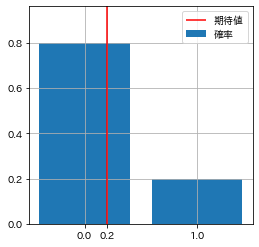

In [39]:
plot_prob(X, size=(4, 4))